# Agglomerative Clustering (Bottom-Up)

Agglomerative Clustering is a type of hierarchical clustering technique used to group data points into clusters based on their similarity. It is a bottom-up approach where each data point starts in its own cluster, and pairs of clusters are merged step by step based on certain criteria until all points are grouped into a single cluster or until a stopping condition (like a predefined number of clusters) is met.



###simple explanation:
Imagine you have a bunch of data points, like dots on a piece of paper. At the beginning, each dot is considered its own cluster. Then, the algorithm starts to find the two dots (or clusters) that are closest to each other and merges them into a new, bigger cluster. This process repeats, merging the closest clusters together, one step at a time. It keeps doing this until all the dots are grouped into one big cluster, or until you decide to stop when a certain number of clusters are formed.

##Prepare the sample Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate synthetic data with 3 clusters
n_samples = 300
n_features = 2
n_clusters = 3

# Generate data
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=0.60, random_state=0)


In [32]:
print("data points\n",X[:5])

data points
 [[ 0.42857674  4.9739971 ]
 [ 1.61990909  0.06764529]
 [ 1.43289271  4.37679234]
 [-1.57846247  3.03445802]
 [-1.65862863  2.26746029]]


## Convert to DataFrame

In [38]:
# Convert to DataFrame
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

In [39]:
print(data[:5])

   Feature 1  Feature 2
0   0.428577   4.973997
1   1.619909   0.067645
2   1.432893   4.376792
3  -1.578462   3.034458
4  -1.658629   2.267460


In [53]:
print('length of data table: ',len(data))

length of data table:  300


# Visualize the sample data in a scatter plot

<ipython-input-54-8162964c1636>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Feature 1'], data['Feature 2'], c=None, cmap='viridis', marker='o')


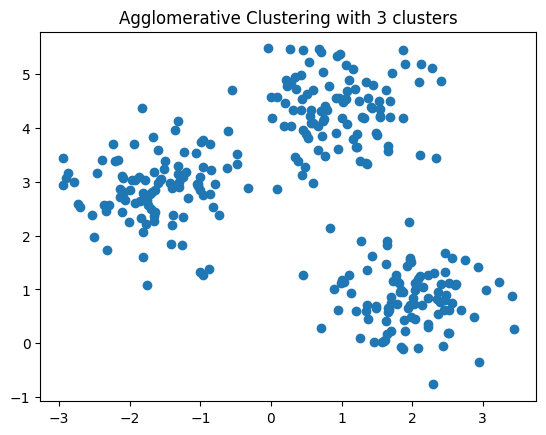

In [54]:
# Plot the clusters
import matplotlib.pyplot as plt
plt.scatter(data['Feature 1'], data['Feature 2'], c=None, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering with 3 clusters')
plt.show()

##  Perform Agglomerative Clustering using scipy


In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Generate the linkage matrix
Z = linkage(data, method='ward')

print(Z[:10])

[[1.05000000e+02 2.58000000e+02 2.77489553e-03 2.00000000e+00]
 [2.34000000e+02 2.81000000e+02 9.75014192e-03 2.00000000e+00]
 [1.70000000e+01 1.82000000e+02 1.23490606e-02 2.00000000e+00]
 [3.20000000e+01 2.20000000e+02 1.26424175e-02 2.00000000e+00]
 [5.30000000e+01 1.89000000e+02 1.43068081e-02 2.00000000e+00]
 [3.40000000e+01 1.03000000e+02 1.59312475e-02 2.00000000e+00]
 [2.19000000e+02 2.49000000e+02 1.88497545e-02 2.00000000e+00]
 [2.00000000e+00 2.80000000e+02 1.96634065e-02 2.00000000e+00]
 [1.13000000e+02 2.24000000e+02 2.20755842e-02 2.00000000e+00]
 [1.37000000e+02 1.76000000e+02 2.29628194e-02 2.00000000e+00]]


# Plot the dendrogram to visualize the hierarchical clustering

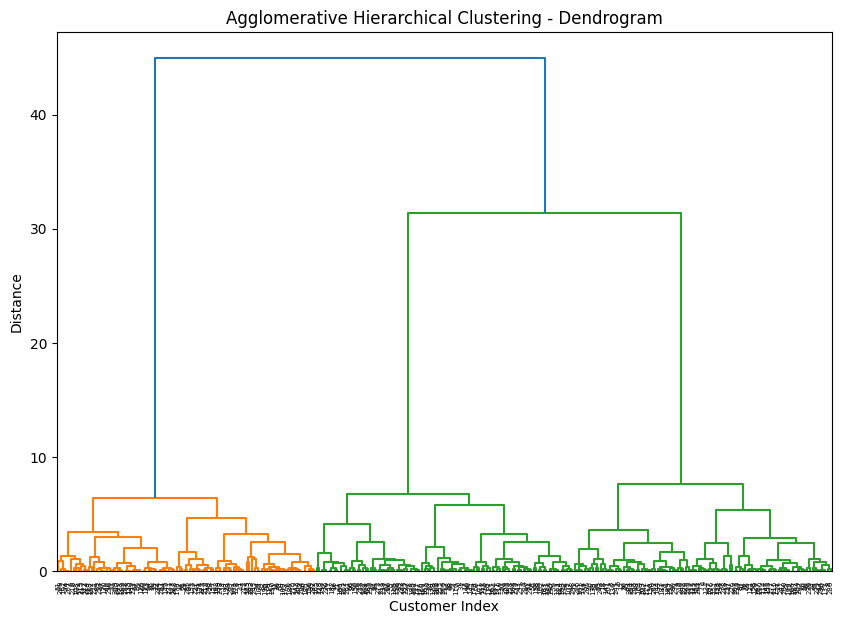

In [56]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Agglomerative Hierarchical Clustering - Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Determine clusters by cutting the dendrogram

To find the best place to cut the dendrogram for the right number of clusters, follow these steps:

###`Look at the Dendrogram:`
* Find the big jumps or gaps between the horizontal lines in the dendrogram. These jumps indicate where clusters are combined.

###`Find the Big Gaps`
* Big gaps between lines usually suggest natural places to cut. If you see a large vertical distance where there are few connections, that’s often a good place to cut.

###`Decide How Many Clusters You Want`
* Choose how many clusters you want. For example, if you want 3 clusters, find a place on the dendrogram where cutting gives you 3 separate groups.

###`Draw the Line:`
* Draw a horizontal line at a height where you see the right number of separate groups below it.

In [57]:
max_d = 15  # Example cut-off distance (adjust based on the dendrogram)
agglomerative_clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the original data
data['Agglomerative Cluster'] = agglomerative_clusters

print(data[:5])

   Feature 1  Feature 2  Agglomerative Cluster
0   0.428577   4.973997                      2
1   1.619909   0.067645                      1
2   1.432893   4.376792                      2
3  -1.578462   3.034458                      3
4  -1.658629   2.267460                      3


# Visualize the agglomerative clusters

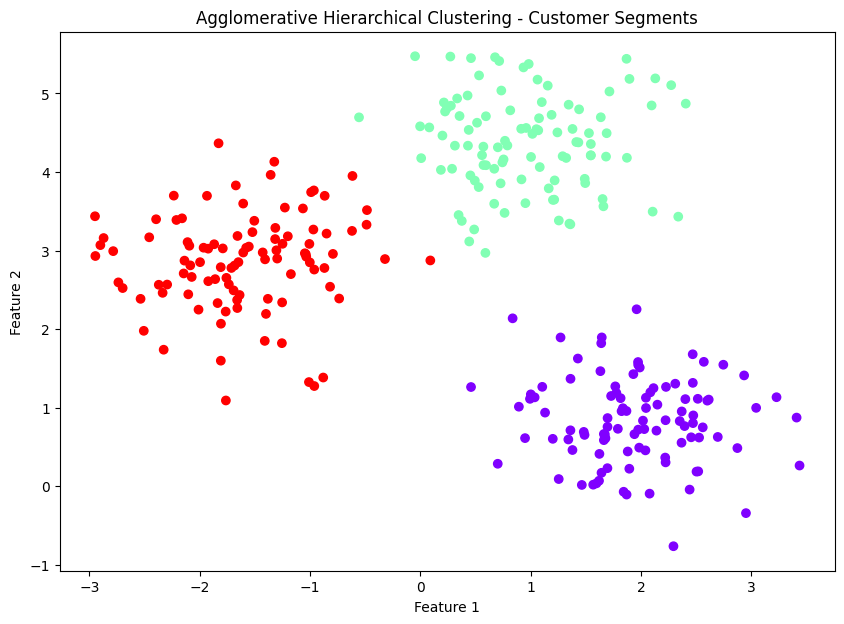

In [58]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['Agglomerative Cluster'], cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Hierarchical Clustering - Customer Segments')
plt.show()

# Second method to do that
## Perform Agglomerative Clustering using sklearn

In [59]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
Agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = Agglomerative_clustering.fit_predict(X)

print("cluster labels of each data points \n\n", clusters)

cluster labels of each data points 

 [2 1 2 0 0 0 1 2 0 0 1 1 1 2 1 0 2 2 0 1 0 2 1 2 0 0 2 0 1 1 0 2 2 1 1 0 1
 0 2 1 0 1 2 1 1 0 1 0 0 1 0 1 0 0 1 2 2 0 0 2 1 1 2 0 1 0 2 1 2 1 0 0 0 0
 1 2 1 0 2 2 0 2 1 2 2 2 1 0 2 2 0 1 0 2 1 1 2 1 0 2 1 0 2 1 2 2 0 2 1 1 2
 0 2 2 0 0 2 2 1 1 1 0 1 1 1 0 1 1 1 0 0 0 2 0 0 1 0 2 0 0 1 2 1 2 0 0 2 0
 0 1 2 0 2 1 0 0 1 1 2 1 2 2 1 2 0 2 2 2 2 0 1 2 0 1 1 1 2 1 2 2 1 0 2 2 2
 2 1 0 2 0 2 2 1 1 0 2 1 0 2 0 1 0 2 0 1 0 2 0 2 1 2 2 0 1 1 1 1 2 0 1 2 1
 1 1 2 0 0 2 2 0 2 1 1 2 1 0 0 0 2 2 1 0 0 0 0 1 0 0 2 1 1 2 1 1 0 2 1 0 2
 2 0 2 0 0 2 0 2 1 1 1 1 2 2 2 2 2 0 0 1 2 2 1 1 1 0 1 0 0 1 1 0 0 0 1 2 2
 0 1 2 0]


## Visualize the agglomerative clusters

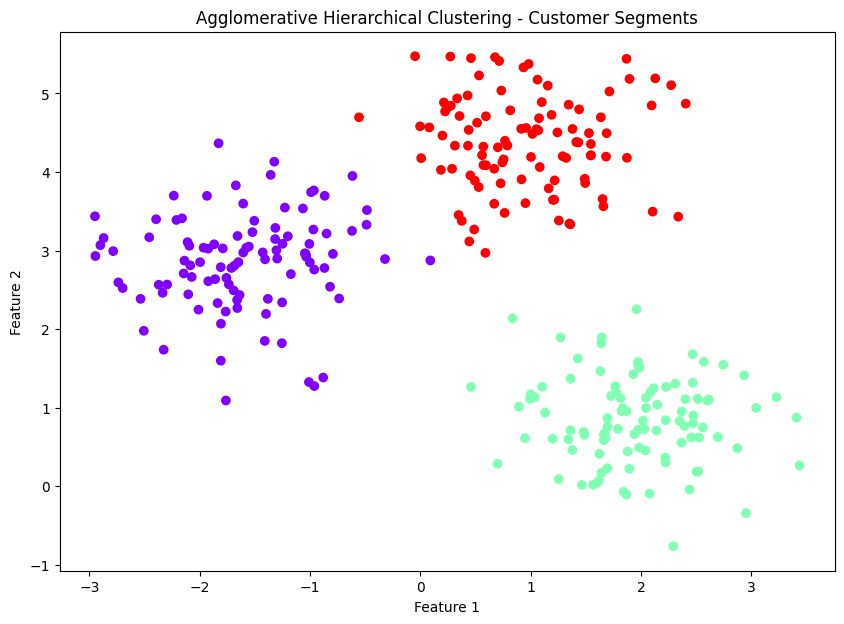

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Feature 1'], data['Feature 2'], c=clusters, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Hierarchical Clustering - Customer Segments')
plt.show()

END